In [215]:
# Imports

import pandas as pd
import sqlite3 as sql
import os
import matplotlib.pyplot as plt
import seaborn as sns


In [216]:
path = os.getcwd()
path = os.path.dirname(path)
path = os.path.join(path,'data/transfermarket/transfermarket.db')


In [217]:
# Connect to the sqlite3 database file.  
con = sql.connect(path)

# read the .db file from the specified SQL commands
players = pd.read_sql("""SELECT *
                          FROM players
                          LIMIT 10;""",con)

#'SELECT * FROM players' says that we are selecting all the columns from the players table, and LIMIT 10 just limits it
# to just the first 10

# We need to close the connection
con.close()

players


,player_id,first_name,last_name,name,last_season,current_club_id,player_code,country_of_birth,city_of_birth,country_of_citizenship,...,foot,height_in_cm,contract_expiration_date,agent_name,image_url,url,current_club_domestic_competition_id,current_club_name,market_value_in_eur,highest_market_value_in_eur
0,10,Miroslav,Klose,Miroslav Klose,2015,398,miroslav-klose,Poland,Opole,Germany,...,right,184.0,None,ASBW Sport Marketing,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/miroslav-klose...,IT1,Società Sportiva Lazio S.p.A.,1000000.0,30000000.0
1,26,Roman,Weidenfeller,Roman Weidenfeller,2017,16,roman-weidenfeller,Germany,Diez,Germany,...,left,190.0,None,Neubauer 13 GmbH,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/roman-weidenfe...,L1,Borussia Dortmund,750000.0,8000000.0
2,65,Dimitar,Berbatov,Dimitar Berbatov,2015,1091,dimitar-berbatov,Bulgaria,Blagoevgrad,Bulgaria,...,None,NaN,None,CSKA-AS-23 Ltd.,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/dimitar-berbat...,GR1,Panthessalonikios Athlitikos Omilos Konstantin...,1000000.0,34500000.0
3,77,None,Lúcio,Lúcio,2012,506,lucio,Brazil,Brasília,Brazil,...,None,NaN,None,None,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/lucio/profil/s...,IT1,Juventus Football Club,200000.0,24500000.0
4,80,Tom,Starke,Tom Starke,2017,27,tom-starke,East Germany (GDR),Freital,Germany,...,right,194.0,None,IFM,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/tom-starke/pro...,L1,FC Bayern München,100000.0,3000000.0
5,109,None,Dedê,Dedê,2013,825,dede,Brazil,Belo Horizonte,Brazil,...,None,NaN,None,Football Concept,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/dede/profil/sp...,TR1,Eskisehirspor,400000.0,9500000.0
6,123,Christoph,Metzelder,Christoph Metzelder,2012,33,christoph-metzelder,Germany,Haltern,Germany,...,None,NaN,None,None,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/christoph-metz...,L1,FC Schalke 04,1500000.0,9500000.0
7,132,Tomas,Rosicky,Tomas Rosicky,2015,11,tomas-rosicky,CSSR,Praha,Czech Republic,...,both,179.0,None,None,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/tomas-rosicky/...,GB1,Arsenal Football Club,350000.0,17500000.0
8,162,Marc,Ziegler,Marc Ziegler,2012,79,marc-ziegler,Germany,Blieskastel,Germany,...,right,193.0,None,None,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/marc-ziegler/p...,L1,Verein für Bewegungsspiele Stuttgart 1893,200000.0,1250000.0
9,215,Roque,Santa Cruz,Roque Santa Cruz,2015,1084,roque-santa-cruz,Paraguay,Asunción,Paraguay,...,right,193.0,2023-12-31 00:00:00,None,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/roque-santa-cr...,ES1,Málaga CF,250000.0,12000000.0


# Lets try to get the players with their current worth

The usual order for the captilized words in SQL is

* SELECT
* FROM
* JOIN 
    * LEFT JOIN
    * INNER JOIN (which you can just use JOIN)
    * RIGHT JOIN
* WHERE
* GROUP BY
* HAVING
* ORDER BY
* LIMIT



In [223]:
con = sql.connect(path)

players_EPL_2425 = pd.read_sql("""SELECT players.name AS name,
                                competitions.name AS league,
                               players.current_club_name AS club,
                               players.position AS position,
                               players.market_value_in_eur as transfer_worth
                               FROM players
                               LEFT JOIN competitions ON competitions.competition_id = players.current_club_domestic_competition_id
                               WHERE league = 'premier-league' and club='Arsenal Football Club'
                               ORDER BY name
                               LIMIT 40;""",con)

con.close()

players_EPL_2425.dropna()

players_EPL_2425

,name,league,club,position,transfer_worth
0,Alex Kirk,premier-league,Arsenal Football Club,Defender,150000.0
1,Amario Cozier-Duberry,premier-league,Arsenal Football Club,Attack,2000000.0
2,André Santos,premier-league,Arsenal Football Club,Defender,100000.0
3,Arthur Okonkwo,premier-league,Arsenal Football Club,Goalkeeper,1800000.0
4,Ayden Heaven,premier-league,Arsenal Football Club,Defender,300000.0
5,Ben Cottrell,premier-league,Arsenal Football Club,Midfield,175000.0
6,Ben Sheaf,premier-league,Arsenal Football Club,Midfield,3800000.0
7,Ben White,premier-league,Arsenal Football Club,Defender,55000000.0
8,Bradley Ibrahim,premier-league,Arsenal Football Club,Midfield,400000.0
9,Bukayo Saka,premier-league,Arsenal Football Club,Attack,140000000.0


# Functions in SQL

We can use functions, like avg  COUNT, and others to make it easier to make tables

In [219]:
con = sql.connect(path)

avg_transfer_per_position = pd.read_sql("""SELECT players.position AS position,
                                        competitions.name AS league,
                                    avg(players.market_value_in_eur) AS avg_pos_value,
                                    max(players.market_value_in_eur) AS max_pos_value,
                                    min(players.market_value_in_eur) AS min_pos_value
                                    FROM players
                                    JOIN competitions ON competitions.competition_id = players.current_club_domestic_competition_id
                                    WHERE league = 'premier-league'
                                    GROUP BY position
                                    ORDER BY avg_pos_value DESC
                                    LIMIT 10""",con)
con.close()
avg_transfer_per_position

,position,league,avg_pos_value,max_pos_value,min_pos_value
0,Attack,premier-league,8.787842e+06,180000000.0,25000.0
1,Midfield,premier-league,7.038166e+06,130000000.0,10000.0
2,Defender,premier-league,6.198257e+06,80000000.0,10000.0
3,Goalkeeper,premier-league,2.894500e+06,35000000.0,10000.0
4,Missing,premier-league,1.166667e+05,150000.0,100000.0


# Lets look at each club individually and their distribution

In [220]:
con = sql.connect(path)

avg_transfer_top_5 = pd.read_sql("""SELECT clubs.name AS club,
                                        competitions.name AS league,
                                    players.position AS position,
                                    avg(players.market_value_in_eur)/1000000 AS avg_player_value_per_mil,
                                    max(players.market_value_in_eur)/1000000 AS max_player_value_per_mil,
                                    min(players.market_value_in_eur)/1000000 AS min_player_value_per_mil
                                    FROM clubs
                                    JOIN competitions ON competitions.competition_id = clubs.domestic_competition_id
                                    JOIN players ON players.current_club_name = clubs.name
                                    WHERE league = 'premier-league'
                                    AND (club='Arsenal Football Club' 
                                    OR club = 'Manchester City Football Club'
                                    OR club='Liverpool FC'
                                    OR club='Aston Villa Football Club'
                                    OR club = 'Chelsea Football Club')
                                    GROUP BY club,position;""",con)
con.close()
avg_transfer_top_5

,club,league,position,avg_player_value_per_mil,max_player_value_per_mil,min_player_value_per_mil
0,Arsenal Football Club,premier-league,Attack,28.093333,140.00,0.050
1,Arsenal Football Club,premier-league,Defender,16.536000,80.00,0.050
2,Arsenal Football Club,premier-league,Goalkeeper,8.420000,35.00,0.300
3,Arsenal Football Club,premier-league,Midfield,12.504464,120.00,0.175
4,Aston Villa Football Club,premier-league,Attack,9.154348,65.00,0.075
5,Aston Villa Football Club,premier-league,Defender,6.998387,45.00,0.100
6,Aston Villa Football Club,premier-league,Goalkeeper,2.925000,28.00,0.150
7,Aston Villa Football Club,premier-league,Midfield,8.268966,50.00,0.075
8,Aston Villa Football Club,premier-league,Missing,0.150000,0.15,0.150
9,Chelsea Football Club,premier-league,Attack,16.685714,55.00,0.200


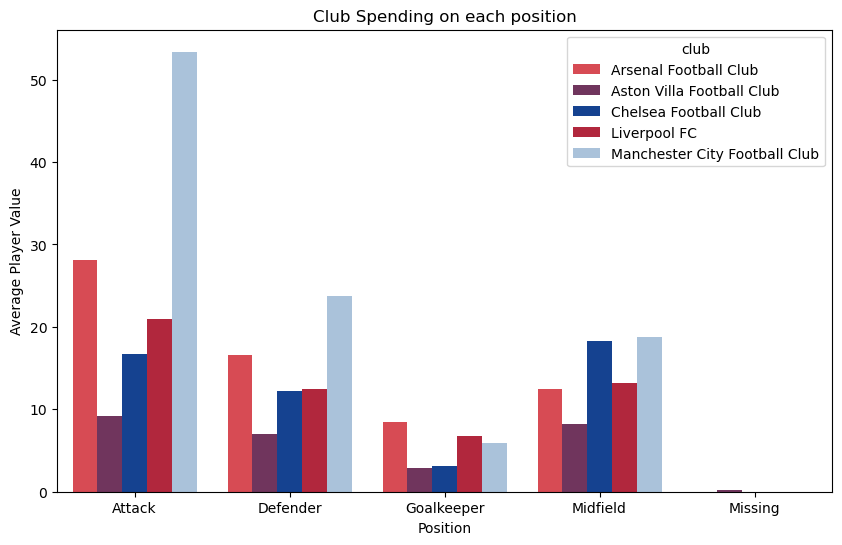

In [222]:
plt.figure(figsize=(10,6))
custom_palette = {
    'Arsenal Football Club' : '#EF3340',
    'Liverpool FC': '#c8102E',
    'Manchester City Football Club': '#A2C2E2',
    'Aston Villa Football Club': '#7A2B60',
    'Chelsea Football Club' : '#003DA5'
}

sns.barplot(x='position',y='avg_player_value_per_mil',hue='club',data=avg_transfer_top_5,palette=custom_palette)
plt.xlabel('Position')
plt.ylabel('Average Player Value')
plt.title('Club Spending on each position')
plt.show()

In [205]:
con = sql.connect(path)

avg_transfer_per_club = pd.read_sql("""SELECT clubs.name AS club,
                                        competitions.name AS league,
                                    players.position AS position,
                                    avg(players.market_value_in_eur)/1000000 AS avg_player_value_per_mil,
                                    max(players.market_value_in_eur)/1000000 AS max_player_value_per_mil,
                                    min(players.market_value_in_eur)/1000000 AS min_player_value_per_mil
                                    FROM clubs
                                    JOIN competitions ON competitions.competition_id = clubs.domestic_competition_id
                                    JOIN players ON players.current_club_name = clubs.name
                                    WHERE league = 'premier-league'
                                    GROUP BY club,position;""",con)
con.close()
avg_transfer_per_club

,club,league,position,avg_player_value_per_mil,max_player_value_per_mil,min_player_value_per_mil
0,Arsenal Football Club,premier-league,Attack,28.093333,140.0,0.050
1,Arsenal Football Club,premier-league,Defender,16.536000,80.0,0.050
2,Arsenal Football Club,premier-league,Goalkeeper,8.420000,35.0,0.300
3,Arsenal Football Club,premier-league,Midfield,12.504464,120.0,0.175
4,Association Football Club Bournemouth,premier-league,Attack,6.271591,35.0,0.100
...,...,...,...,...,...,...
147,Wigan Athletic,premier-league,Midfield,0.175000,0.2,0.150
148,Wolverhampton Wanderers Football Club,premier-league,Attack,8.882812,45.0,0.075
149,Wolverhampton Wanderers Football Club,premier-league,Defender,4.610714,35.0,0.150
150,Wolverhampton Wanderers Football Club,premier-league,Goalkeeper,4.071429,14.0,0.150


/tmp/ipykernel_194468/3628397815.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)


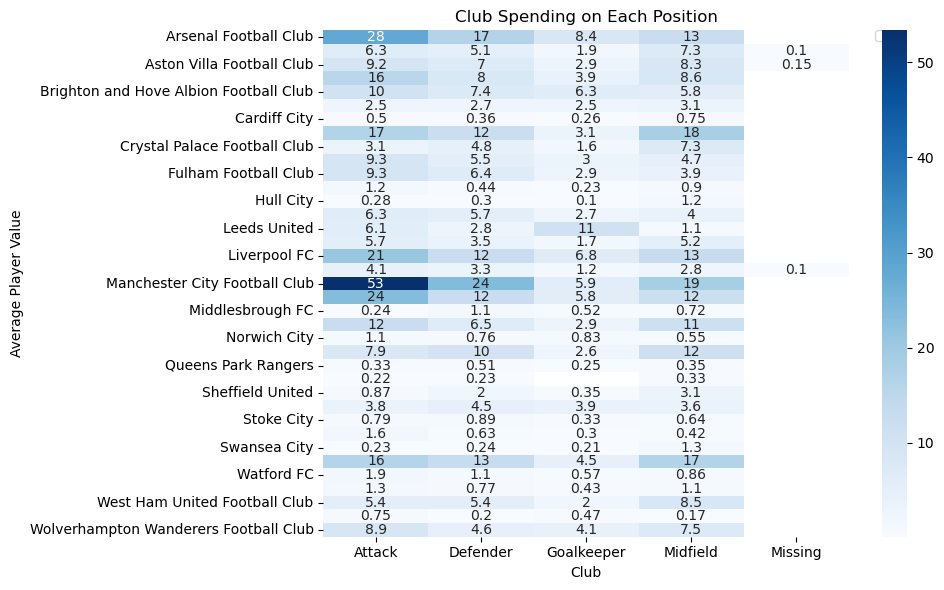

In [206]:
plt.figure(figsize=(10, 6))
df_pivot = avg_transfer_per_club.pivot(index='club',columns='position',values='avg_player_value_per_mil')
sns.heatmap(annot=True, data=df_pivot, cmap='Blues')

# Add labels and title
plt.xlabel('Club')
plt.ylabel('Average Player Value')
plt.title('Club Spending on Each Position')

# Move the legend to the right
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

# Show plot
plt.tight_layout()  # Adjust the layout
plt.show()

# More Data Analysis on position over all

Lets look at the distribution of market values over all the players in the English Premier League, as we can see from the above avgs and max is that there is some huge outliers.

In [207]:
con = sql.connect(path)

players_EPL_2425 = pd.read_sql("""SELECT players.name AS name,
                                competitions.name AS league,
                               players.current_club_name AS club,
                               players.position AS position,
                               players.market_value_in_eur/1000000 as transfer_worth
                               FROM players
                               LEFT JOIN competitions ON competitions.competition_id = players.current_club_domestic_competition_id
                               WHERE league = 'premier-league'
                               ORDER BY name;""",con)

con.close()

players_EPL_2425.dropna()

,name,league,club,position,transfer_worth
0,Aaron Connolly,premier-league,Brighton and Hove Albion Football Club,Attack,3.5
1,Aaron Cresswell,premier-league,West Ham United Football Club,Defender,0.9
2,Aaron Hickey,premier-league,Brentford Football Club,Defender,28.0
3,Aaron Keto-Diyawa,premier-league,Wolverhampton Wanderers Football Club,Defender,0.2
4,Aaron Lennon,premier-league,Burnley FC,Attack,0.6
...,...,...,...,...,...
2186,Álex Moreno,premier-league,Nottingham Forest Football Club,Defender,13.0
2187,Álvaro Arbeloa,premier-league,West Ham United Football Club,Defender,1.5
2188,Ángel Rangel,premier-league,Swansea City,Defender,0.3
2189,Óscar Ustari,premier-league,Sunderland AFC,Goalkeeper,0.6


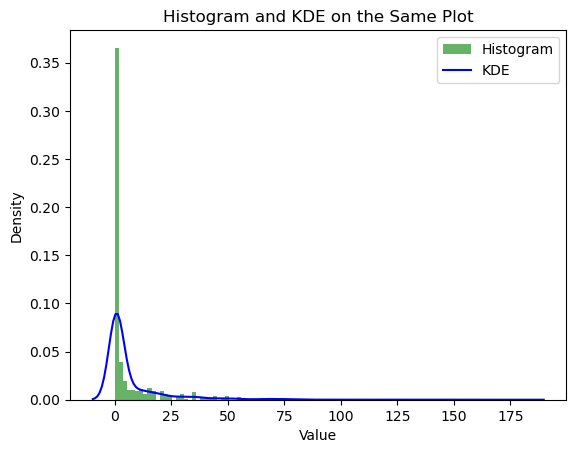

In [208]:
# Sample data
data = players_EPL_2425['transfer_worth']

# Create the figure and axis
fig, ax = plt.subplots()
#sns.set_theme(rc={'figure.figsize':(9,7)})

# Plot histogram
ax.hist(data, bins=100, density=True, alpha=0.6, color='g', label='Histogram')

# Plot KDE
sns.kdeplot(data, ax=ax, color='b', label='KDE')

# Add labels and title
ax.set_xlabel('Value')
ax.set_ylabel('Density')
ax.set_title('Histogram and KDE on the Same Plot')

# Show legend
ax.legend()

# Show the plot
plt.show()

In [209]:
con = sql.connect(path)

top_market_players = pd.read_sql("""SELECT players.name AS name,
                                competitions.name AS league,
                               players.current_club_name AS club,
                               players.position AS position,
                               players.market_value_in_eur/1000000 as market_worth
                               FROM players
                               LEFT JOIN competitions ON competitions.competition_id = players.current_club_domestic_competition_id
                               WHERE league = 'premier-league'
                               ORDER BY market_worth DESC
                               LIMIT 10;""",con)

con.close()


top_market_players=top_market_players.dropna()
top_market_players

,name,league,club,position,market_worth
0,Erling Haaland,premier-league,Manchester City Football Club,Attack,180.0
1,Phil Foden,premier-league,Manchester City Football Club,Attack,150.0
2,Bukayo Saka,premier-league,Arsenal Football Club,Attack,140.0
3,Rodri,premier-league,Manchester City Football Club,Midfield,130.0
4,Declan Rice,premier-league,Arsenal Football Club,Midfield,120.0
5,Martin Ødegaard,premier-league,Arsenal Football Club,Midfield,110.0
6,Julián Alvarez,premier-league,Manchester City Football Club,Attack,90.0
7,Bruno Guimarães,premier-league,Newcastle United Football Club,Midfield,85.0
8,Cole Palmer,premier-league,Chelsea Football Club,Midfield,80.0
9,Rúben Dias,premier-league,Manchester City Football Club,Defender,80.0


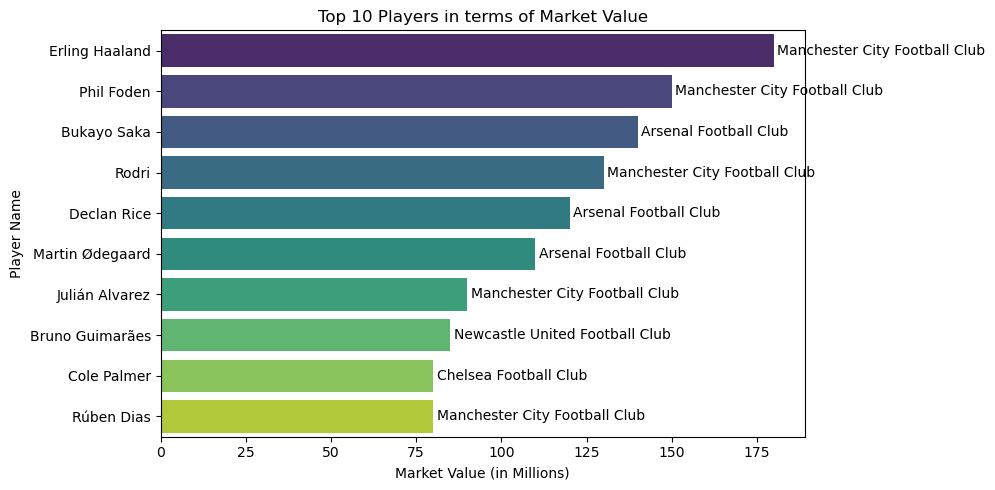

In [210]:

data = top_market_players.sort_values(by='market_worth',ascending=False)

fig, ax = plt.subplots(figsize=(10,5))

bar_plot = sns.barplot(x='market_worth',y='name',data=data,palette='viridis',hue='name')
bars = ax.patches
team_names = data['club'].tolist()

for bar, team_name in zip(bars, team_names):
    ax.text(
        bar.get_width() + 1,     # x-coordinate of the label (a bit to the right of the bar)
        bar.get_y() + bar.get_height() / 2,  # y-coordinate (center of the bar)
        team_name,               # The text (team name)
        va='center',             # Vertical alignment
        fontsize=10              # Font size of the label
    )

plt.title('Top 10 Players in terms of Market Value')
plt.xlabel('Market Value (in Millions)')
plt.ylabel('Player Name')
plt.tight_layout()
plt.show()

## Lets get the time series data for individual players market value

In [211]:
con = sql.connect(path)

player_value_time_series = pd.read_sql("""SELECT players.name AS player_name,
                                       player_value.date AS date,
                                       competitions.name AS league,
                                       player_value.market_value_in_eur AS market_value
                                       FROM players
                                       JOIN player_valuations AS player_value ON player_value.player_id = players.player_id
                                       JOIN clubs ON clubs.club_id = player_value.current_club_id
                                       JOIN competitions ON competitions.competition_id = clubs.domestic_competition_id
                                       WHERE player_name = 'Declan Rice'
                                       GROUP BY date
                                       ORDER BY date""",con)

con.close()
player_value_time_series

,player_name,date,league,market_value
0,Declan Rice,2017-10-23,premier-league,500000
1,Declan Rice,2018-01-02,premier-league,2000000
2,Declan Rice,2018-05-28,premier-league,10000000
3,Declan Rice,2018-10-17,premier-league,15000000
4,Declan Rice,2018-12-19,premier-league,20000000
5,Declan Rice,2019-03-05,premier-league,35000000
6,Declan Rice,2019-06-13,premier-league,45000000
7,Declan Rice,2019-09-12,premier-league,50000000
8,Declan Rice,2019-12-10,premier-league,55000000
9,Declan Rice,2020-04-08,premier-league,49500000


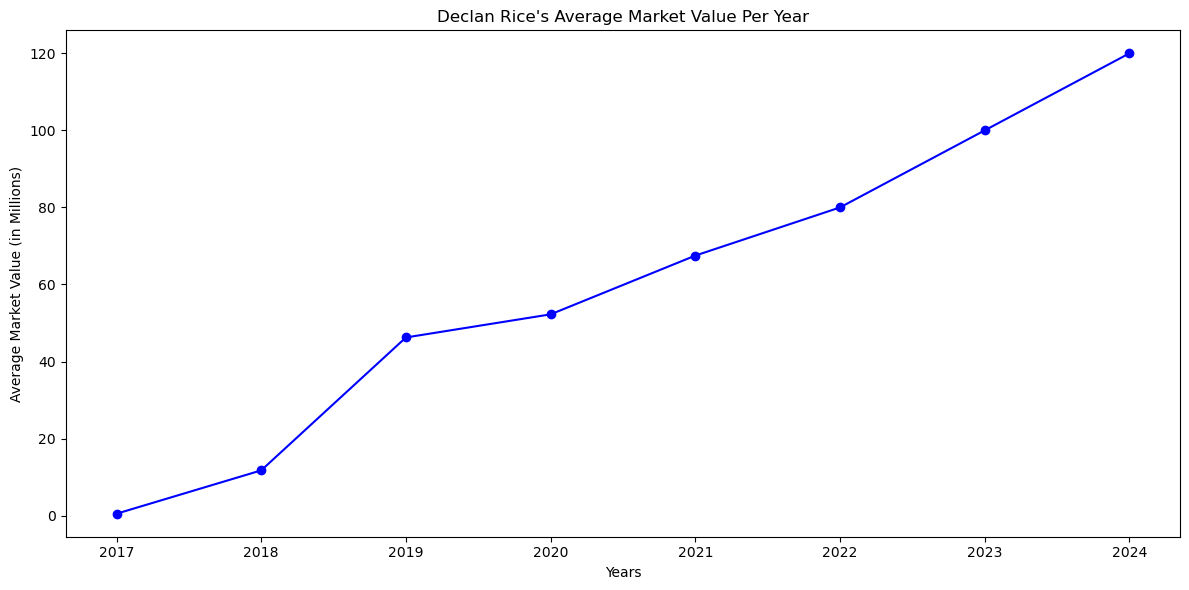

In [212]:
data = player_value_time_series
aug_data = data
aug_data['market_value'] = data['market_value']/1000000
aug_data['date'] = pd.to_datetime(aug_data['date'])

aug_data['year'] = aug_data['date'].dt.year
data_grouped = aug_data.groupby('year')['market_value'].mean().reset_index()
plt.figure(figsize=(12,6))

plt.plot(data_grouped['year'],data_grouped['market_value'],marker='o',linestyle='-',color='b')
plt.title(f"{data['player_name'].iloc[0]}'s Average Market Value Per Year")
plt.ylabel('Average Market Value (in Millions)')
plt.xlabel('Years')
plt.tight_layout()
plt.show()

In [213]:
# Lets add the other top players to this graph
top_players = list(top_market_players['name'])
print(top_players)
con = sql.connect(path)
placeholders = placeholders = ','.join(['?'] * len(top_players))


top_players_ts = pd.read_sql(f"""SELECT players.name AS player_name,
                                       player_value.date AS date,
                                       competitions.name AS league,
                                       player_value.market_value_in_eur AS market_value
                                       FROM players
                                       JOIN player_valuations AS player_value ON player_value.player_id = players.player_id
                                       JOIN clubs ON clubs.club_id = player_value.current_club_id
                                       JOIN competitions ON competitions.competition_id = clubs.domestic_competition_id
                                       WHERE player_name IN ({placeholders})
                                       ORDER BY date""",con,params=top_players)

con.close()
top_players_ts[top_players_ts['player_name'] == 'Declan Rice']


['Erling Haaland', 'Phil Foden', 'Bukayo Saka', 'Rodri', 'Declan Rice', 'Martin Ødegaard', 'Julián Alvarez', 'Bruno Guimarães', 'Cole Palmer', 'Rúben Dias']


,player_name,date,league,market_value
42,Declan Rice,2017-10-23,premier-league,500000
47,Declan Rice,2018-01-02,premier-league,2000000
53,Declan Rice,2018-05-28,premier-league,10000000
59,Declan Rice,2018-10-17,premier-league,15000000
64,Declan Rice,2018-12-19,premier-league,20000000
72,Declan Rice,2019-03-05,premier-league,35000000
81,Declan Rice,2019-06-13,premier-league,45000000
86,Declan Rice,2019-09-12,premier-league,50000000
93,Declan Rice,2019-12-10,premier-league,55000000
106,Declan Rice,2020-04-08,premier-league,49500000


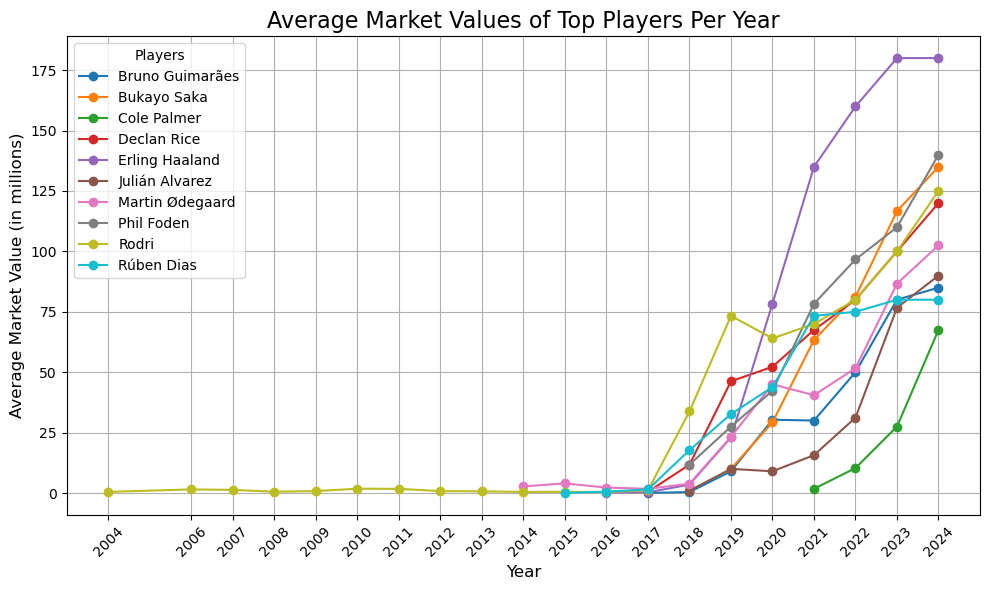

In [214]:
data = top_players_ts
data['market_value'] = data['market_value']/1000000
data['date'] = pd.to_datetime(data['date'])
data['year'] = data['date'].dt.year

avg = data.groupby(['year','player_name'])['market_value'].mean().reset_index()


data_pivot = avg.pivot(index='year',columns='player_name',values='market_value')


plt.figure(figsize=(10,6))

for player in data_pivot.columns:
    plt.plot(data_pivot.index,data_pivot[player],marker='o',label=player)

plt.title("Average Market Values of Top Players Per Year", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Market Value (in millions)", fontsize=12)
plt.xticks(data_pivot.index, data_pivot.index, rotation=45)
plt.legend(title="Players")
plt.grid()

plt.tight_layout()
plt.show()